In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot
import random
import cv2
import scipy
from sklearn.metrics.pairwise import euclidean_distances

# ret = []

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
file_dir = "cifar-10-batches-py/"
file_names = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5", "test_batch"]
data_arr, label_arr = None, None
for f in file_names:
    temp = unpickle(file_dir + f)
    data_arr  = temp[b'data'] if data_arr is None else np.concatenate((data_arr, temp[b'data']), axis = 0)
    label_arr = temp[b'labels'] if label_arr is None else np.concatenate((label_arr, temp[b'labels']), axis = 0)
cat_arr = [[] for i in range(10)]
for i in range(len(label_arr)):
    cat_arr[label_arr[i]].append(data_arr[i])
    
print([np.asarray(cat_arr[i]).shape for i in range(10)])

mean_arr = [np.mean(temp, axis = 0, dtype = float) for temp in cat_arr]


[(6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072), (6000, 3072)]


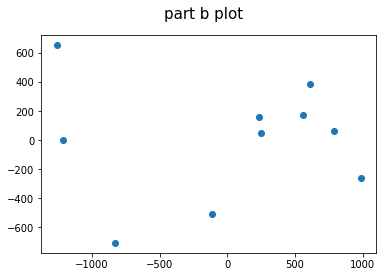

In [2]:
# Euclidean Distance Matrix
ed_matrix = euclidean_distances(mean_arr, mean_arr, squared = True)
for i in range (ed_matrix.shape[0]):
    ed_matrix[i][i] = 0

def MDS(D, N, s):
    A = np.identity(N) - 1/N*np.ones((N, N))
    W = -1/2*A@D@A.T
    u, sig, vh = np.linalg.svd(W)
    sig2 = np.diag(sig)
    Y = u[:, 0:s]@np.sqrt(sig2[0:s, 0:s])
    return Y
Y_plot = MDS(ed_matrix, 10, 2)

part_b = pyplot.figure()
part_b.suptitle('part b plot', fontsize = 15)
x_data = Y_plot[:, 0]
y_data = Y_plot[:, 1]
pyplot.scatter(x_data, y_data)

np.savetxt("partb_distances.csv", ed_matrix, delimiter=",")

In [3]:
def A_PCA(train, recon, mean_arr):
    t_pca = PCA()
    t_pca.fit(train - mean_arr)
    t_mat = t_pca.transform(recon - mean_arr)
    return np.dot(t_mat[:, :20], t_pca.components_[:20, :]) + mean_arr

def Dist2(cat, rec):
    holder = []
    for i in range(len(rec)):
        holder.append(scipy.spatial.distance.euclidean(cat[i], rec[i])**2)
    return np.mean(holder)

# Part C
partc_distances = np.zeros((10, 10))
for i in range(10):
    for j in range(i, 10):
        print(i*10 + j, " complete")
        partc_distances[i, j] = (Dist2(cat_arr[i], A_PCA(cat_arr[j], cat_arr[i], mean_arr[j])) + 
                          Dist2(cat_arr[j], A_PCA(cat_arr[i], cat_arr[j], mean_arr[i])))/2
        if(i != j):
            partc_distances[j, i] = partc_distances[i, j]

0  complete
1  complete
2  complete
3  complete
4  complete
5  complete
6  complete
7  complete
8  complete
9  complete
11  complete
12  complete
13  complete
14  complete
15  complete
16  complete
17  complete
18  complete
19  complete
22  complete
23  complete
24  complete
25  complete
26  complete
27  complete
28  complete
29  complete
33  complete
34  complete
35  complete
36  complete
37  complete
38  complete
39  complete
44  complete
45  complete
46  complete
47  complete
48  complete
49  complete
55  complete
56  complete
57  complete
58  complete
59  complete
66  complete
67  complete
68  complete
69  complete
77  complete
78  complete
79  complete
88  complete
89  complete
99  complete


In [6]:
np.savetxt("partc_distances.csv", partc_distances, delimiter=",")

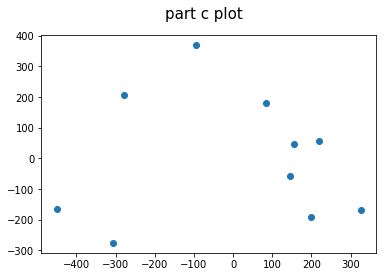

In [7]:
pc_plot = MDS(partc_distances, 10, 2)

part_c = pyplot.figure()
part_c.suptitle('part c plot', fontsize = 15)
x_dat = pc_plot[:, 0]
y_dat = pc_plot[:, 1]
pyplot.scatter(x_dat, y_dat)